In [33]:
from PIL import Image
import numpy as np
import os
import glob
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
import numpy as np
import cv2


In [6]:

def load_dan_tampilkan_gambar(folder_path):
    image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    print(f"Jumlah gambar ditemukan: {len(image_paths)}")
    print("Daftar file:")
    
    images = []
    for path in image_paths:
        print("-", os.path.basename(path))
        img = Image.open(path).convert('RGB')  # load dan konversi ke RGB
        images.append((os.path.basename(path), img))
    
    return images


In [7]:
def resize_image(img, width=224, height=224):
    resized = img.resize((width, height))
    return resized


In [37]:
def resize_imagecv(img, width=224, height=224):
    resized = cv2.resize(img, (width, height))
    return resized

In [8]:
def rgb_to_hsv_manual(img):
    img_np = np.asarray(img) / 255.0  # normalize to 0–1
    r, g, b = img_np[..., 0], img_np[..., 1], img_np[..., 2]
    
    cmax = np.max(img_np, axis=2)
    cmin = np.min(img_np, axis=2)
    delta = cmax - cmin
    
    s = np.where(cmax == 0, 0, delta / cmax)
    
    return s  # kita hanya ambil channel S saja


In [9]:
def mean_filter_3x3(img_array):
    padded = np.pad(img_array, pad_width=1, mode='edge')
    result = np.zeros_like(img_array)
    
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            neighborhood = padded[i:i+3, j:j+3]
            result[i, j] = np.mean(neighborhood)
    
    return result


In [10]:
def normalize_image(img_array):
    norm = img_array - np.min(img_array)
    norm = norm / (np.max(norm) + 1e-6)
    return norm


In [ ]:


def extract_lbp_features(img_array, radius=1):
    n_points = 8 * radius
    lbp = local_binary_pattern(img_array, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist


In [28]:
from skimage.feature import local_binary_pattern

def extract_lbp_map(img_array, radius=1, method='uniform'):
    n_points = 8 * radius
    lbp = local_binary_pattern(img_array, n_points, radius, method=method)
    return lbp


In [12]:
def process_image_manual(img):
    img_resized = resize_image(img)
    s_channel = rgb_to_hsv_manual(img_resized)
    s_blurred = mean_filter_3x3(s_channel)
    s_normalized = normalize_image(s_blurred)
    lbp_feature = extract_lbp_features(s_normalized)
    return lbp_feature


In [13]:
folder_path = './Kanker Serviks Detection/'
images = load_dan_tampilkan_gambar(folder_path)

for filename, img in images:
    fitur = process_image_manual(img)
    print(f"{filename} → Panjang fitur LBP: {len(fitur)}")


Jumlah gambar ditemukan: 108
Daftar file:
- AAAW1.jpg
- AAAW2.jpg
- AAAW3.jpg
- AAAW4.jpg
- AADE1.jpg
- AADE2.jpg
- AADE3.jpg
- AADE4.jpg
- AADG1.jpg
- AADG2.jpg
- AADG3.jpg
- AADG4.jpg
- AAEG1.jpg
- AAEG2.jpg
- AAEG3.jpg
- AAER1.jpg
- AAER2.jpg
- AAER3.jpg
- AAER4.jpg
- AAFU1.jpg
- AAFU2.jpg
- AAFU3.jpg
- AAFU4.jpg
- AAFU5.jpg
- AAFY1.jpg
- AAFY2.jpg
- AAFY3.jpg
- AAFY4.jpg
- AAFZ1.jpg
- AAFZ2.jpg
- AAFZ3.jpg
- AAFZ4.jpg
- AAGB0.jpg
- AAGB1.jpg
- AAGB2.jpg
- AAGB5.jpg
- AAGB7.jpg
- AAGB8.jpg
- AAGB9.jpg
- AAGC0.jpg
- AAGC1.jpg
- AAGC2.jpg
- AAGC3.jpg
- AAGD0.jpg
- AAGD2.jpg
- AAGD3.jpg
- AAGD5.jpg
- AAGF0.jpg
- AAGF1.jpg
- AAGF2.jpg
- AAGG0.jpg
- AAGG1.jpg
- AAGG2.jpg
- AAGG3.jpg
- AAGG4.jpg
- AAHE.jpg
- AAHE0.jpg
- AAHE1.jpg
- AAHE3.jpg
- AAHE4.jpg
- AAHV0.jpg
- AAHV1.jpg
- AAHV2.jpg
- AAIH0.jpg
- AAIH1.jpg
- AAIH3.jpg
- AAIH4.jpg
- AAIL0.jpg
- AAIL1.jpg
- AAIL2.jpg
- AAIL3.jpg
- AAIL4.jpg
- AAIM0.jpg
- AAIM1.jpg
- AAIM2.jpg
- AAIM3.jpg
- AAIN0.jpg
- AAIN1.jpg
- AAIN2.jpg
- AAIN3.jpg

C:\Users\puguh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


AAAW1.jpg → Panjang fitur LBP: 10
AAAW2.jpg → Panjang fitur LBP: 10
AAAW3.jpg → Panjang fitur LBP: 10
AAAW4.jpg → Panjang fitur LBP: 10
AADE1.jpg → Panjang fitur LBP: 10
AADE2.jpg → Panjang fitur LBP: 10
AADE3.jpg → Panjang fitur LBP: 10
AADE4.jpg → Panjang fitur LBP: 10
AADG1.jpg → Panjang fitur LBP: 10


C:\Users\puguh\AppData\Local\Temp\ipykernel_28300\2236268306.py:9: RuntimeWarning: invalid value encountered in divide
  s = np.where(cmax == 0, 0, delta / cmax)


AADG2.jpg → Panjang fitur LBP: 10
AADG3.jpg → Panjang fitur LBP: 10
AADG4.jpg → Panjang fitur LBP: 10
AAEG1.jpg → Panjang fitur LBP: 10
AAEG2.jpg → Panjang fitur LBP: 10
AAEG3.jpg → Panjang fitur LBP: 10
AAER1.jpg → Panjang fitur LBP: 10
AAER2.jpg → Panjang fitur LBP: 10
AAER3.jpg → Panjang fitur LBP: 10
AAER4.jpg → Panjang fitur LBP: 10
AAFU1.jpg → Panjang fitur LBP: 10
AAFU2.jpg → Panjang fitur LBP: 10
AAFU3.jpg → Panjang fitur LBP: 10
AAFU4.jpg → Panjang fitur LBP: 10
AAFU5.jpg → Panjang fitur LBP: 10
AAFY1.jpg → Panjang fitur LBP: 10
AAFY2.jpg → Panjang fitur LBP: 10
AAFY3.jpg → Panjang fitur LBP: 10
AAFY4.jpg → Panjang fitur LBP: 10
AAFZ1.jpg → Panjang fitur LBP: 10
AAFZ2.jpg → Panjang fitur LBP: 10
AAFZ3.jpg → Panjang fitur LBP: 10
AAFZ4.jpg → Panjang fitur LBP: 10
AAGB0.jpg → Panjang fitur LBP: 10
AAGB1.jpg → Panjang fitur LBP: 10
AAGB2.jpg → Panjang fitur LBP: 10
AAGB5.jpg → Panjang fitur LBP: 10
AAGB7.jpg → Panjang fitur LBP: 10
AAGB8.jpg → Panjang fitur LBP: 10
AAGB9.jpg → Pa

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def tampilkan_tahapan(img):
    # Tahap 1: gambar asli
    asli = img
    
    # Tahap 2: resize 224x224 (manual)
    resized = resize_imagecv(asli, 224, 224)
    
    # Tahap 3: konversi RGB ke HSV dan ambil S channel
    s_channel = rgb_to_hsv_manual(resized)  # langsung s_channel tanpa indexing

    
    # Tahap 4: LBF 3x3 (misal hasil filter)
    lbf_img = mean_filter_3x3(s_channel)
    
    # Tahap 5: normalisasi (misal ke 0-1)
    norm_img = (lbf_img - np.min(lbf_img)) / (np.max(lbf_img) - np.min(lbf_img))
    
    # Tahap 6: ekstraksi LBP (misal hasil peta LBP)
    lbp_img = extract_lbp_map(norm_img)
    
    # Tampilkan semua
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.ravel()
    axes[0].imshow(asli)
    axes[0].set_title('1. Gambar Asli')
    axes[0].axis('off')
    
    axes[1].imshow(resized)
    axes[1].set_title('2. Resize 224x224')
    axes[1].axis('off')
    
    axes[2].imshow(s_channel, cmap='gray')
    axes[2].set_title('3. Channel S dari HSV')
    axes[2].axis('off')
    
    axes[3].imshow(lbf_img, cmap='gray')
    axes[3].set_title('4. LBF 3x3')
    axes[3].axis('off')
    
    axes[4].imshow(norm_img, cmap='gray')
    axes[4].set_title('5. Normalisasi')
    axes[4].axis('off')
    
    axes[5].imshow(lbp_img, cmap='gray')
    axes[5].set_title('6. Peta LBP')
    axes[5].axis('off')
    
    plt.tight_layout()
    plt.show()


Visualisasi tahapan untuk gambar: ./Kanker Serviks Detection/AAIQ0.jpg


C:\Users\puguh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


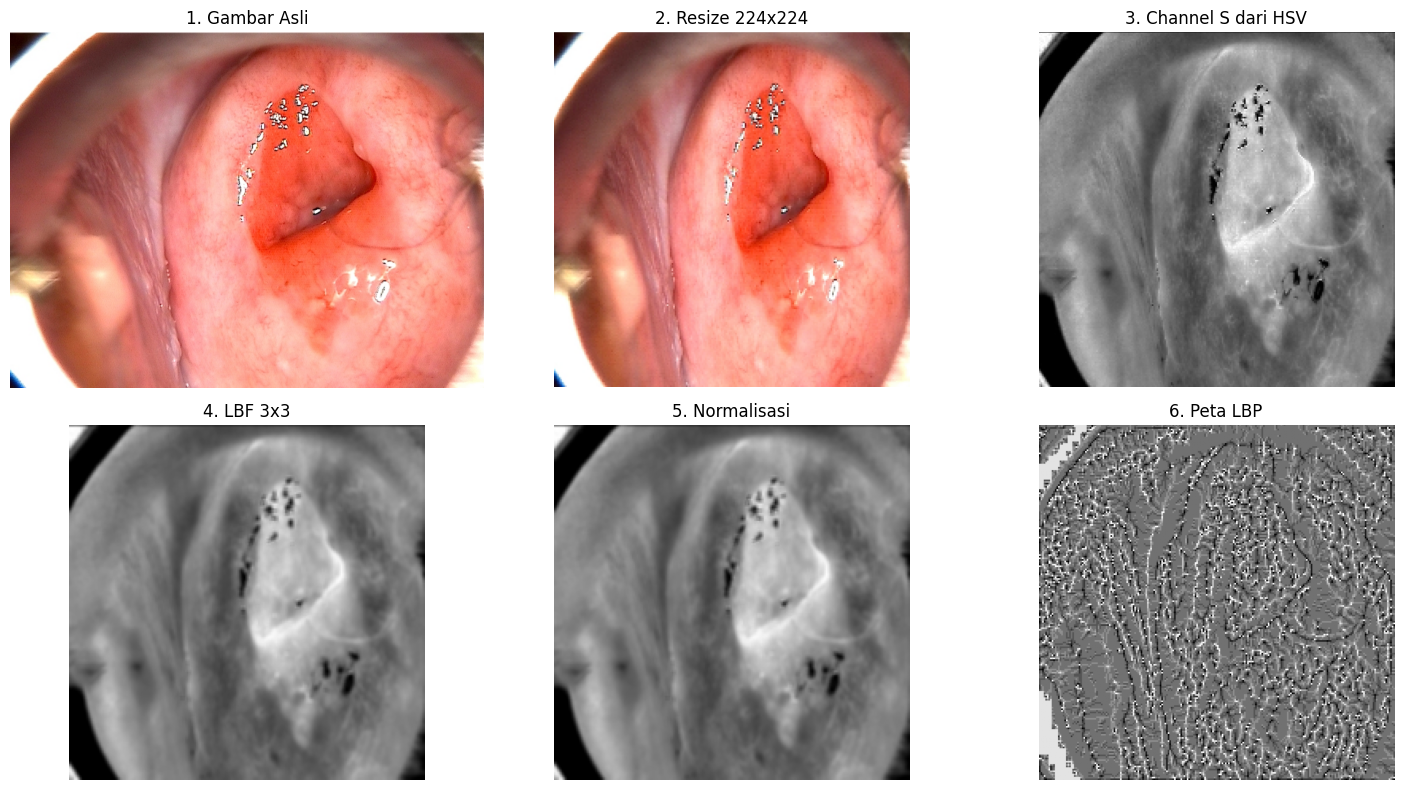

In [ ]:
path_gambar = './Kanker Serviks Detection/AAIQ0.jpg'  # contoh path lengkap

img = cv2.imread(path_gambar)
if img is None:
    print(f"Gagal load gambar dari path: {path_gambar}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"Visualisasi tahapan untuk gambar: {path_gambar}")
    tampilkan_tahapan(img)


C:\Users\puguh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
C:\Users\puguh\AppData\Local\Temp\ipykernel_28300\2236268306.py:9: RuntimeWarning: invalid value encountered in divide
  s = np.where(cmax == 0, 0, delta / cmax)


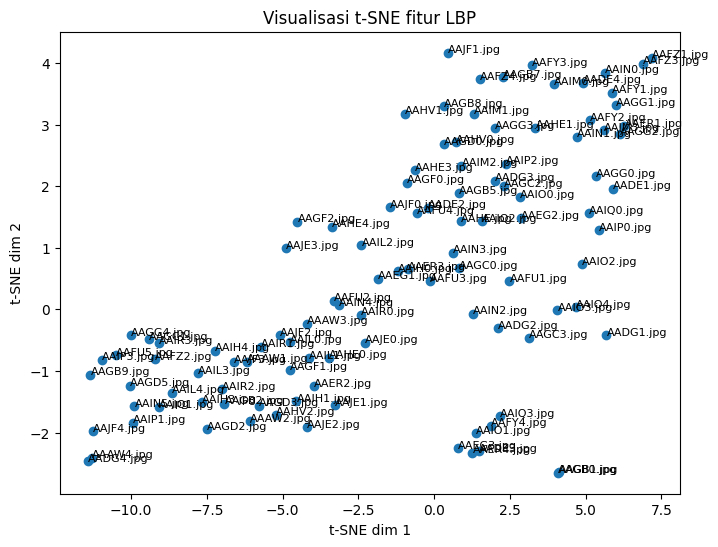

In [41]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# 1. Ekstrak fitur LBP semua gambar dan simpan ke list
fitur_semua = []
label_semua = []  # Optional kalau mau simpan label/filename

for filename, img in images:
    fitur = process_image_manual(img)  # asumsikan hasil fitur berupa array 1D
    fitur_semua.append(fitur)
    label_semua.append(filename)

# 2. Ubah list fitur jadi numpy array
X = np.array(fitur_semua)  # shape (n_samples, n_features)

# 3. Jalankan t-SNE untuk reduksi dimensi ke 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)  # shape (n_samples, 2)

# 4. Visualisasi hasil t-SNE
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1])
for i, txt in enumerate(label_semua):
    plt.annotate(txt, (X_tsne[i,0], X_tsne[i,1]), fontsize=8)
plt.title("Visualisasi t-SNE fitur LBP")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.show()


In [42]:
fitur_list = []

for filename, img in images:
    fitur = process_image_manual(img)
    fitur_list.append(fitur)
    print(f"{filename} → Panjang fitur LBP: {len(fitur)}")


C:\Users\puguh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


AAAW1.jpg → Panjang fitur LBP: 10
AAAW2.jpg → Panjang fitur LBP: 10
AAAW3.jpg → Panjang fitur LBP: 10
AAAW4.jpg → Panjang fitur LBP: 10
AADE1.jpg → Panjang fitur LBP: 10
AADE2.jpg → Panjang fitur LBP: 10
AADE3.jpg → Panjang fitur LBP: 10
AADE4.jpg → Panjang fitur LBP: 10
AADG1.jpg → Panjang fitur LBP: 10


C:\Users\puguh\AppData\Local\Temp\ipykernel_28300\2236268306.py:9: RuntimeWarning: invalid value encountered in divide
  s = np.where(cmax == 0, 0, delta / cmax)


AADG2.jpg → Panjang fitur LBP: 10
AADG3.jpg → Panjang fitur LBP: 10
AADG4.jpg → Panjang fitur LBP: 10
AAEG1.jpg → Panjang fitur LBP: 10
AAEG2.jpg → Panjang fitur LBP: 10
AAEG3.jpg → Panjang fitur LBP: 10
AAER1.jpg → Panjang fitur LBP: 10
AAER2.jpg → Panjang fitur LBP: 10
AAER3.jpg → Panjang fitur LBP: 10
AAER4.jpg → Panjang fitur LBP: 10
AAFU1.jpg → Panjang fitur LBP: 10
AAFU2.jpg → Panjang fitur LBP: 10
AAFU3.jpg → Panjang fitur LBP: 10
AAFU4.jpg → Panjang fitur LBP: 10
AAFU5.jpg → Panjang fitur LBP: 10
AAFY1.jpg → Panjang fitur LBP: 10
AAFY2.jpg → Panjang fitur LBP: 10
AAFY3.jpg → Panjang fitur LBP: 10
AAFY4.jpg → Panjang fitur LBP: 10
AAFZ1.jpg → Panjang fitur LBP: 10
AAFZ2.jpg → Panjang fitur LBP: 10
AAFZ3.jpg → Panjang fitur LBP: 10
AAFZ4.jpg → Panjang fitur LBP: 10
AAGB0.jpg → Panjang fitur LBP: 10
AAGB1.jpg → Panjang fitur LBP: 10
AAGB2.jpg → Panjang fitur LBP: 10
AAGB5.jpg → Panjang fitur LBP: 10
AAGB7.jpg → Panjang fitur LBP: 10
AAGB8.jpg → Panjang fitur LBP: 10
AAGB9.jpg → Pa

In [43]:
import numpy as np

X = np.array(fitur_list)  # fitur LBP jadi array 2D


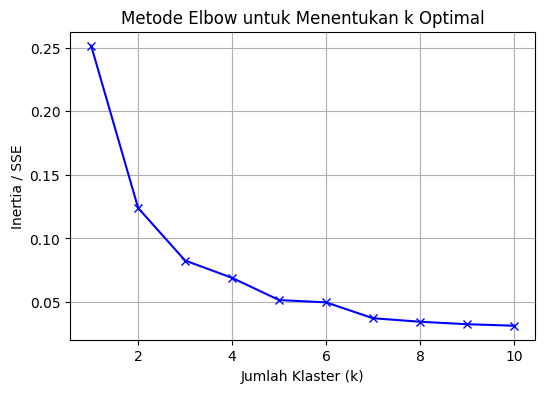

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K = range(1, 11)  # coba 1 sampai 10 klaster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia / SSE')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.grid(True)
plt.show()


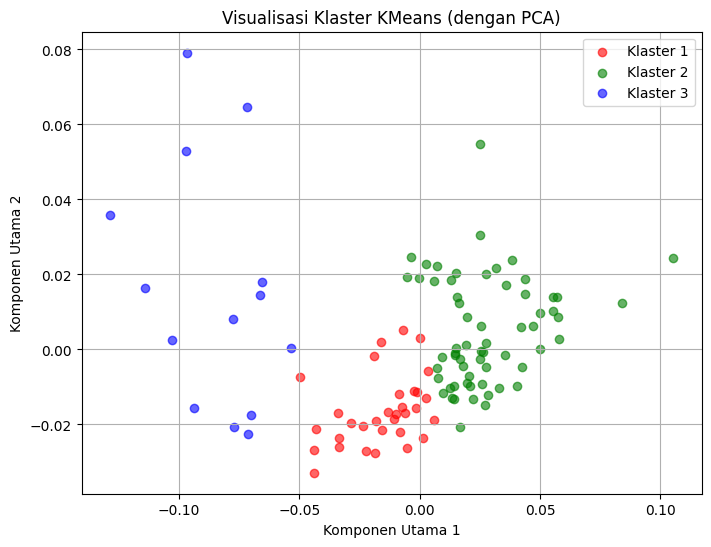

In [48]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Langkah 1: PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Langkah 2: KMeans dengan jumlah klaster optimal (misal 3 dari Elbow)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Langkah 3: Visualisasi hasil klaster
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], 
                c=colors[i], label=f'Klaster {i+1}', alpha=0.6)

plt.title("Visualisasi Klaster KMeans (dengan PCA)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend()
plt.grid(True)
plt.show()


In [16]:

folder_path = './Kanker Serviks Detection/'
images = load_dan_tampilkan_gambar(folder_path)

fitur_all = []
for filename, img in images:
    fitur = process_image_manual(img)  # proses preprocessing + ekstrak fitur LBP
    fitur_all.append(fitur)

X = np.array(fitur_all)  # ubah list fitur jadi numpy array

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)  # latih model kmeans dengan fitur

labels = kmeans.labels_  # label klaster tiap gambar

for i, label in enumerate(labels):
    print(f"{images[i][0]} masuk ke klaster {label}")

Jumlah gambar ditemukan: 108
Daftar file:
- AAAW1.jpg
- AAAW2.jpg
- AAAW3.jpg
- AAAW4.jpg
- AADE1.jpg
- AADE2.jpg
- AADE3.jpg
- AADE4.jpg
- AADG1.jpg
- AADG2.jpg
- AADG3.jpg
- AADG4.jpg
- AAEG1.jpg
- AAEG2.jpg
- AAEG3.jpg
- AAER1.jpg
- AAER2.jpg
- AAER3.jpg
- AAER4.jpg
- AAFU1.jpg
- AAFU2.jpg
- AAFU3.jpg
- AAFU4.jpg
- AAFU5.jpg
- AAFY1.jpg
- AAFY2.jpg
- AAFY3.jpg
- AAFY4.jpg
- AAFZ1.jpg
- AAFZ2.jpg
- AAFZ3.jpg
- AAFZ4.jpg
- AAGB0.jpg
- AAGB1.jpg
- AAGB2.jpg
- AAGB5.jpg
- AAGB7.jpg
- AAGB8.jpg
- AAGB9.jpg
- AAGC0.jpg
- AAGC1.jpg
- AAGC2.jpg
- AAGC3.jpg
- AAGD0.jpg
- AAGD2.jpg
- AAGD3.jpg
- AAGD5.jpg
- AAGF0.jpg
- AAGF1.jpg
- AAGF2.jpg
- AAGG0.jpg
- AAGG1.jpg
- AAGG2.jpg
- AAGG3.jpg
- AAGG4.jpg
- AAHE.jpg
- AAHE0.jpg
- AAHE1.jpg
- AAHE3.jpg
- AAHE4.jpg
- AAHV0.jpg
- AAHV1.jpg
- AAHV2.jpg
- AAIH0.jpg
- AAIH1.jpg
- AAIH3.jpg
- AAIH4.jpg
- AAIL0.jpg
- AAIL1.jpg
- AAIL2.jpg
- AAIL3.jpg
- AAIL4.jpg
- AAIM0.jpg
- AAIM1.jpg
- AAIM2.jpg
- AAIM3.jpg
- AAIN0.jpg
- AAIN1.jpg
- AAIN2.jpg
- AAIN3.jpg

C:\Users\puguh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
C:\Users\puguh\AppData\Local\Temp\ipykernel_28300\2236268306.py:9: RuntimeWarning: invalid value encountered in divide
  s = np.where(cmax == 0, 0, delta / cmax)


AAAW1.jpg masuk ke klaster 0
AAAW2.jpg masuk ke klaster 0
AAAW3.jpg masuk ke klaster 0
AAAW4.jpg masuk ke klaster 2
AADE1.jpg masuk ke klaster 1
AADE2.jpg masuk ke klaster 1
AADE3.jpg masuk ke klaster 1
AADE4.jpg masuk ke klaster 1
AADG1.jpg masuk ke klaster 1
AADG2.jpg masuk ke klaster 1
AADG3.jpg masuk ke klaster 1
AADG4.jpg masuk ke klaster 2
AAEG1.jpg masuk ke klaster 0
AAEG2.jpg masuk ke klaster 1
AAEG3.jpg masuk ke klaster 1
AAER1.jpg masuk ke klaster 1
AAER2.jpg masuk ke klaster 0
AAER3.jpg masuk ke klaster 1
AAER4.jpg masuk ke klaster 1
AAFU1.jpg masuk ke klaster 1
AAFU2.jpg masuk ke klaster 0
AAFU3.jpg masuk ke klaster 1
AAFU4.jpg masuk ke klaster 1
AAFU5.jpg masuk ke klaster 2
AAFY1.jpg masuk ke klaster 1
AAFY2.jpg masuk ke klaster 1
AAFY3.jpg masuk ke klaster 1
AAFY4.jpg masuk ke klaster 1
AAFZ1.jpg masuk ke klaster 1
AAFZ2.jpg masuk ke klaster 2
AAFZ3.jpg masuk ke klaster 1
AAFZ4.jpg masuk ke klaster 1
AAGB0.jpg masuk ke klaster 1
AAGB1.jpg masuk ke klaster 1
AAGB2.jpg masu

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.375



Gambar di klaster 0:


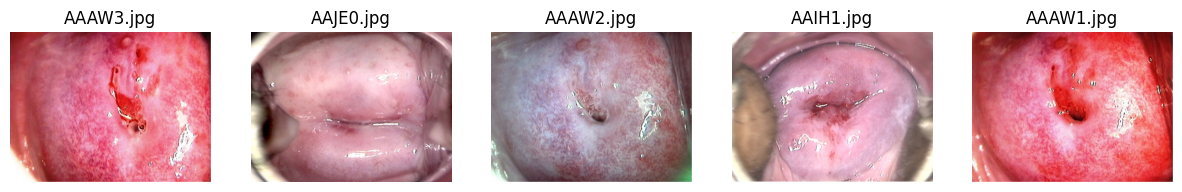


Gambar di klaster 2:


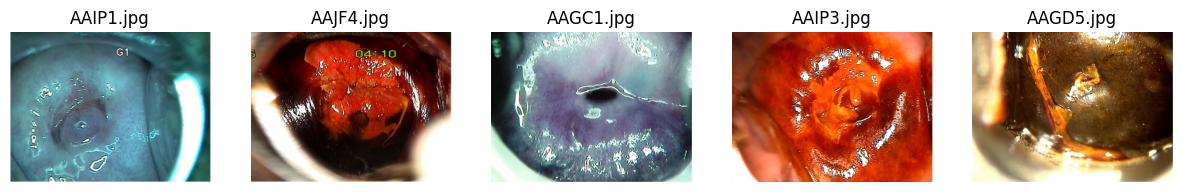


Gambar di klaster 1:


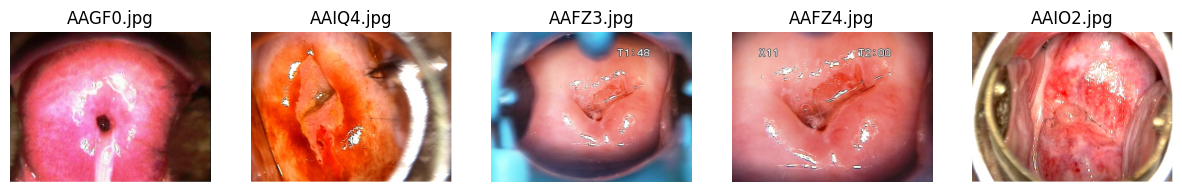

In [52]:
import matplotlib.pyplot as plt
import random

cluster_dict = {}
for i, (filename, img) in enumerate(images):
    label = labels[i]
    cluster_dict.setdefault(label, []).append((filename, img))

for label, imgs in cluster_dict.items():
    print(f"\nGambar di klaster {label}:")

    # Ambil 5 gambar secara acak dari klaster ini
    sampled_imgs = random.sample(imgs, min(5, len(imgs)))

    fig, axes = plt.subplots(1, len(sampled_imgs), figsize=(15, 3))
    for ax, (fname, img) in zip(axes, sampled_imgs):
        ax.imshow(img)
        ax.set_title(fname)
        ax.axis('off')
    plt.show()
